In [2]:
#plot l'approximation de Laplace
#ce qu'il y a de nouveau : on rajoute le conditionnement aux observations dans les notations.

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import scipy

from scipy.stats import multivariate_normal as mvn
from scipy.stats import norm
mpl.rcParams['font.size']=22 #10 #16 pour posts
mpl.rcParams['legend.fontsize']=20 #10 12 pour posts
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "sans-serif",
    "font.sans-serif": ["Avant Garde"]})

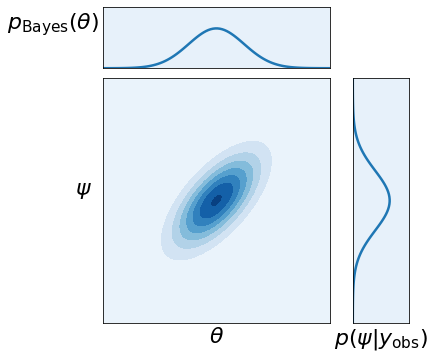

In [7]:
cmap = mpl.cm.get_cmap('Blues')

#paramètres de la loi normale
xlim=[0,10]
cor=1
mean=np.array([5,5])
cov=np.array([[1.5,cor],[cor,1.5]])
x=np.linspace(0,10,100)
X,Y=np.meshgrid(x,x)
pos=np.dstack((X,Y))
rv=mvn(mean=mean,cov=cov)

#marginales. 1: haut, 2:côté
mean1=mean[0]
var1=cov[0,0]
mean2=mean[1]
var2=cov[1,1]
rv1=norm(loc=mean1,scale=np.sqrt(var1))
rv2=norm(loc=mean2,scale=np.sqrt(var2))
valmax=0.5

#plots
fig,axs=plt.subplots(figsize=[6,5],nrows=2,ncols=2,gridspec_kw={'width_ratios': [4, 1],'height_ratios': [1,4],})
axs[0,1].remove()
for axd in axs:
    for ax in axd:
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])

axs[0,0].set_xlim(xlim)
axs[1,1].set_ylim(xlim)
axs[0,1].set_xlim(xlim)
axs[0,1].set_ylim(xlim)
axs[0,0].set_ylim([0,valmax])
axs[1,1].set_xlim([0,valmax])


axs[0,0].plot(x,rv1.pdf(x),lw=2.5)
axs[1,1].plot(rv2.pdf(x),x,lw=2.5)
contour=axs[1,0].contourf(X,Y,rv.pdf(pos),cmap=cmap,linestyles='dashed')
axs[0,0].set_facecolor(cmap(20))
axs[1,1].set_facecolor(cmap(20))

#labels
axs[1,0].set_xlabel(r'$\theta$')
axs[1,0].set_ylabel(r'$\psi$',rotation=0,labelpad=20)
axs[1,1].set_xlabel(r'$p(\psi|y_\mathrm{obs})$')
axs[0,0].set_ylabel(r'$p_{\mathrm{Bayes}}(\theta)$',rotation=0,labelpad=50)

plt.tight_layout(pad=0.3)
plt.show()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


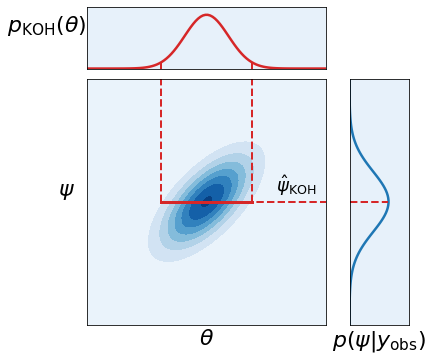

In [5]:
cmap = mpl.cm.get_cmap('Blues')

#paramètres de la loi normale
xlim=[0,10]
cor=1
mean=np.array([5,5])
cov=np.array([[1.5,cor],[cor,1.5]])
x=np.linspace(0,10,100)
X,Y=np.meshgrid(x,x)
pos=np.dstack((X,Y))
rv=mvn(mean=mean,cov=cov)

#marginales. 1: haut, 2:côté
mean1=mean[0]
var1=cov[0,0]-cor**2/cov[1,1]
mean2=mean[1]
var2=cov[1,1]
rv1=norm(loc=mean1,scale=np.sqrt(var1))
rv2=norm(loc=mean2,scale=np.sqrt(var2))
valmax=0.5

#plots
fig,axs=plt.subplots(figsize=[6,5],nrows=2,ncols=2,gridspec_kw={'width_ratios': [4, 1],'height_ratios': [1,4],})
axs[0,1].remove()
for axd in axs:
    for ax in axd:
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])

axs[0,0].set_xlim(xlim)
axs[1,1].set_ylim(xlim)
axs[0,1].set_xlim(xlim)
axs[0,1].set_ylim(xlim)
axs[0,0].set_ylim([0,valmax])
axs[1,1].set_xlim([0,valmax])


axs[0,0].plot(x,rv1.pdf(x),lw=2.5,color='tab:red')
axs[1,1].plot(rv2.pdf(x),x,lw=2.5)
contour=axs[1,0].contourf(X,Y,rv.pdf(pos),cmap=cmap,linestyles='dashed')
axs[0,0].set_facecolor(cmap(20))
axs[1,1].set_facecolor(cmap(20))

#labels
axs[1,0].set_xlabel(r'$\theta$')
axs[1,0].set_ylabel(r'$\psi$',rotation=0,labelpad=20)
axs[1,1].set_xlabel(r'$p(\psi|y_\mathrm{obs})$')
axs[0,0].set_ylabel(r'$p_{\mathrm{KOH}}(\theta)$',rotation=0,labelpad=40)

#droites..
ckoh='tab:red'
lw=2
axs[1,0].plot([3.1,10],[5,5],color=ckoh,linestyle='dashed',lw=lw)
axs[1,0].plot([3.1,6.9],[5,5],color=ckoh,lw=lw+1)
axs[1,0].plot([3.1,3.1],[5,10],color=ckoh,linestyle='dashed',lw=lw)
axs[1,0].plot([6.9,6.9],[5,10],color=ckoh,linestyle='dashed',lw=lw)

axs[0,0].plot([3.1,3.1],[0,0.05],color=ckoh,linestyle='dashed',lw=lw)
axs[0,0].plot([6.9,6.9],[0,0.05],color=ckoh,linestyle='dashed',lw=lw)

axs[1,1].plot([0,0.32],[5,5],color=ckoh,linestyle='dashed',lw=lw)

axs[1,0].annotate(r'$\hat{\psi}_{\mathrm{KOH}}$',[7.9,5.4],fontsize=18)




plt.tight_layout(pad=0.3)
plt.show()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


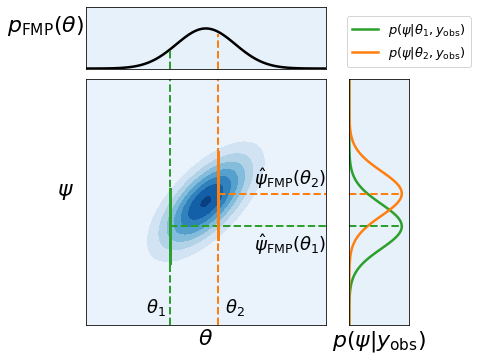

In [6]:
cmap = mpl.cm.get_cmap('Blues')

#paramètres de la loi normale
xlim=[0,10]
cor=1
mean=np.array([5,5])
cov=np.array([[1.5,cor],[cor,1.5]])
x=np.linspace(0,10,100)
X,Y=np.meshgrid(x,x)
pos=np.dstack((X,Y))
rv=mvn(mean=mean,cov=cov)

#marginales. 1: haut, 2:côté
theta1=3.5
theta2=5.5
mean1=mean[0]
var1=cov[0,0]
mean2=mean[1]
var2=cov[1,1]-cor**2/cov[0,0]
hpar1=mean2+cor/cov[0,0]*(theta1-mean1)
hpar2=mean2+cor/cov[0,0]*(theta2-mean1)
rv1=norm(loc=mean1,scale=np.sqrt(var1))
rv21=norm(loc=hpar1,scale=np.sqrt(var2))
rv22=norm(loc=hpar2,scale=np.sqrt(var2))
valmax=0.5

col1='tab:green'
col2='tab:orange'


#plots
fig,axs=plt.subplots(figsize=[6,5],nrows=2,ncols=2,gridspec_kw={'width_ratios': [4, 1],'height_ratios': [1,4],})
axs[0,1].remove()
for axd in axs:
    for ax in axd:
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])

axs[0,0].set_xlim(xlim)
axs[1,1].set_ylim(xlim)
axs[0,1].set_xlim(xlim)
axs[0,1].set_ylim(xlim)
axs[0,0].set_ylim([0,valmax])
axs[1,1].set_xlim([0,valmax])


axs[0,0].plot(x,rv1.pdf(x),lw=2.5,c='black')
axs[1,1].plot(rv21.pdf(x),x,lw=2.5,color=col1,label=r'$p(\psi|\theta_1,y_\mathrm{obs})$')
axs[1,1].plot(rv22.pdf(x),x,lw=2.5,color=col2,label=r'$p(\psi|\theta_2,y_\mathrm{obs})$')
contour=axs[1,0].contourf(X,Y,rv.pdf(pos),cmap=cmap,linestyles='dashed')
axs[0,0].set_facecolor(cmap(20))
axs[1,1].set_facecolor(cmap(20))

#labels
axs[1,0].set_xlabel(r'$\theta$')
axs[1,0].set_ylabel(r'$\psi$',rotation=0,labelpad=20)
axs[1,1].set_xlabel(r'$p(\psi|y_\mathrm{obs})$')
axs[0,0].set_ylabel(r'$p_{\mathrm{FMP}}(\theta)$',rotation=0,labelpad=40)

#droites..
lw=2
#theta1
axs[1,0].plot([theta1,10],[hpar1,hpar1],color=col1,linestyle='dashed',lw=lw)#hori
axs[1,0].plot([theta1,theta1],[0,10],color=col1,linestyle='dashed',lw=lw)#v
axs[1,0].plot([theta1,theta1],[2.5,5.5],color=col1,lw=lw+1)#v

axs[0,0].plot([theta1,theta1],[0,0.15],color=col1,linestyle='dashed',lw=lw)

axs[1,1].plot([0,0.45],[hpar1,hpar1],color=col1,linestyle='dashed',lw=lw)

axs[1,0].annotate(r'$\hat{\psi}_{\mathrm{FMP}}(\theta_1)$',[7,3],fontsize=18)
axs[1,0].annotate(r'$\theta_1$',[2.5,0.5],fontsize=18)

#theta2
axs[1,0].plot([theta2,10],[hpar2,hpar2],color=col2,linestyle='dashed',lw=lw)#hori
axs[1,0].plot([theta2,theta2],[0,10],color=col2,linestyle='dashed',lw=lw)#v
axs[1,0].plot([theta2,theta2],[3.5,7],color=col2,lw=lw+1)#v

axs[0,0].plot([theta2,theta2],[0,0.28],color=col2,linestyle='dashed',lw=lw)

axs[1,1].plot([0,0.45],[hpar2,hpar2],color=col2,linestyle='dashed',lw=lw)

axs[1,0].annotate(r'$\hat{\psi}_{\mathrm{FMP}}(\theta_2)$',[7,5.7],fontsize=18)
axs[1,0].annotate(r'$\theta_2$',[5.8,0.5],fontsize=18)



plt.tight_layout(pad=0.3)
axs[1,1].legend(loc='upper left',bbox_to_anchor=(-0.15,1.28),fontsize=13)
plt.show()

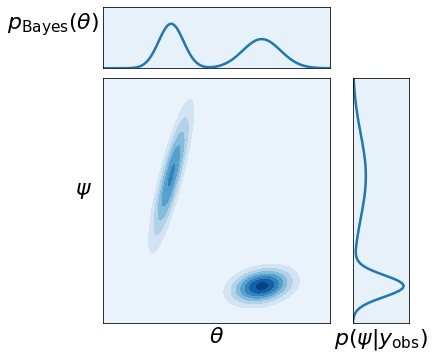

In [8]:
cmap = mpl.cm.get_cmap('Blues')
#deux lois normales maintenant.
#paramètres de la loi normale
xlim=[0,10]
mean1=np.array([3,6])
mean2=np.array([7,1.5])
cor1=0.8
cor2=0.1
p=0.5 #pondération entre les modes
cov1=np.array([[0.3,cor1],[cor1,3]])
cov2=np.array([[0.7,cor2],[cor2,0.2]])

x=np.linspace(0,10,100)
X,Y=np.meshgrid(x,x)
pos=np.dstack((X,Y))
rv1=mvn(mean=mean1,cov=cov1)
rv2=mvn(mean=mean2,cov=cov2)

#marginales. 11:thetamode1 12:thetamode2, etc.
#la mixture doit se faire dans la méthode plot.

mtheta1=norm(loc=mean1[0],scale=np.sqrt(cov1[0,0]))
mtheta2=norm(loc=mean2[0],scale=np.sqrt(cov2[0,0]))
mhpars1=norm(loc=mean1[1],scale=np.sqrt(cov1[1,1]))
mhpars2=norm(loc=mean2[1],scale=np.sqrt(cov2[1,1]))
valmax=0.5

#plots
fig,axs=plt.subplots(figsize=[6,5],nrows=2,ncols=2,gridspec_kw={'width_ratios': [4, 1],'height_ratios': [1,4],})
axs[0,1].remove()
for axd in axs:
    for ax in axd:
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])

axs[0,0].set_xlim(xlim)
axs[1,1].set_ylim(xlim)
axs[0,1].set_xlim(xlim)
axs[0,1].set_ylim(xlim)
axs[0,0].set_ylim([0,valmax])
axs[1,1].set_xlim([0,valmax])


axs[0,0].plot(x,p*mtheta1.pdf(x)+(1-p)*mtheta2.pdf(x),lw=2.5)
axs[1,1].plot(p*mhpars1.pdf(x)+(1-p)*mhpars2.pdf(x),x,lw=2.5)
contour=axs[1,0].contourf(X,Y,p*rv1.pdf(pos)+(1-p)*rv2.pdf(pos),cmap=cmap,linestyles='dashed')
axs[0,0].set_facecolor(cmap(20))
axs[1,1].set_facecolor(cmap(20))

#labels
axs[1,0].set_xlabel(r'$\theta$')
axs[1,0].set_ylabel(r'$\psi$',rotation=0,labelpad=20)
axs[1,1].set_xlabel(r'$p(\psi|y_\mathrm{obs})$')
axs[0,0].set_ylabel(r'$p_{\mathrm{Bayes}}(\theta)$',rotation=0,labelpad=50)

plt.tight_layout(pad=0.3)
plt.show()

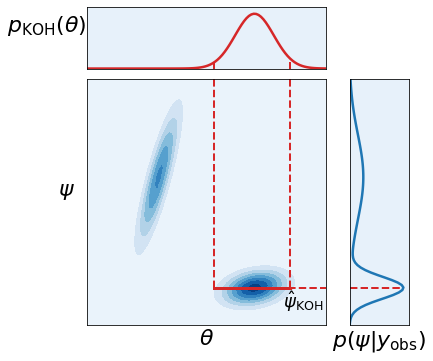

In [8]:
cmap = mpl.cm.get_cmap('Blues')
#deux lois normales maintenant.
#paramètres de la loi normale
xlim=[0,10]
mean1=np.array([3,6])
mean2=np.array([7,1.5])
cor1=0.8
cor2=0.1
p=0.5 #pondération entre les modes
cov1=np.array([[0.3,cor1],[cor1,3]])
cov2=np.array([[0.7,cor2],[cor2,0.2]])

x=np.linspace(0,10,100)
X,Y=np.meshgrid(x,x)
pos=np.dstack((X,Y))
rv1=mvn(mean=mean1,cov=cov1)
rv2=mvn(mean=mean2,cov=cov2)

#marginales. 11:thetamode1 12:thetamode2, etc.
#la mixture doit se faire dans la méthode plot.
#on affiche seulement la miwture theta2 qui est sélectionnée par KOH

var1=cov[0,0]-cor**2/cov[1,1]

mtheta2=norm(loc=mean2[0],scale=np.sqrt(cov2[0,0]-cor2**2/cov2[1,1]))
mhpars1=norm(loc=mean1[1],scale=np.sqrt(cov1[1,1]))
mhpars2=norm(loc=mean2[1],scale=np.sqrt(cov2[1,1]))
valmax=0.5

#plots
fig,axs=plt.subplots(figsize=[6,5],nrows=2,ncols=2,gridspec_kw={'width_ratios': [4, 1],'height_ratios': [1,4],})
axs[0,1].remove()
for axd in axs:
    for ax in axd:
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])

axs[0,0].set_xlim(xlim)
axs[1,1].set_ylim(xlim)
axs[0,1].set_xlim(xlim)
axs[0,1].set_ylim(xlim)
axs[0,0].set_ylim([0,valmax])
axs[1,1].set_xlim([0,valmax])


axs[0,0].plot(x,0.9*mtheta2.pdf(x),lw=2.5,c='tab:red')
axs[1,1].plot(p*mhpars1.pdf(x)+(1-p)*mhpars2.pdf(x),x,lw=2.5)
contour=axs[1,0].contourf(X,Y,p*rv1.pdf(pos)+(1-p)*rv2.pdf(pos),cmap=cmap,linestyles='dashed')
axs[0,0].set_facecolor(cmap(20))
axs[1,1].set_facecolor(cmap(20))

#labels
axs[1,0].set_xlabel(r'$\theta$')
axs[1,0].set_ylabel(r'$\psi$',rotation=0,labelpad=20)
axs[1,1].set_xlabel(r'$p(\psi|y_\mathrm{obs})$')
axs[0,0].set_ylabel(r'$p_{\mathrm{KOH}}(\theta)$',rotation=0,labelpad=40)

#droites..
ckoh='tab:red'
lw=2
xleft=5.3
xright=8.5
yhpars=mean2[1]
axs[1,0].plot([xleft,10],[yhpars,yhpars],color=ckoh,linestyle='dashed',lw=lw)
axs[1,0].plot([xleft,xright],[yhpars,yhpars],color=ckoh,lw=lw+1)
axs[1,0].plot([xleft,xleft],[yhpars,10],color=ckoh,linestyle='dashed',lw=lw)
axs[1,0].plot([xright,xright],[yhpars,10],color=ckoh,linestyle='dashed',lw=lw)

axs[0,0].plot([xleft,xleft],[0,0.05],color=ckoh,linestyle='dashed',lw=lw)
axs[0,0].plot([xright,xright],[0,0.05],color=ckoh,linestyle='dashed',lw=lw)

axs[1,1].plot([0,0.44],[yhpars,yhpars],color=ckoh,linestyle='dashed',lw=lw)

axs[1,0].annotate(r'$\hat{\psi}_{\mathrm{KOH}}$',[8.2,0.7],fontsize=18)

plt.tight_layout(pad=0.3)
plt.show()

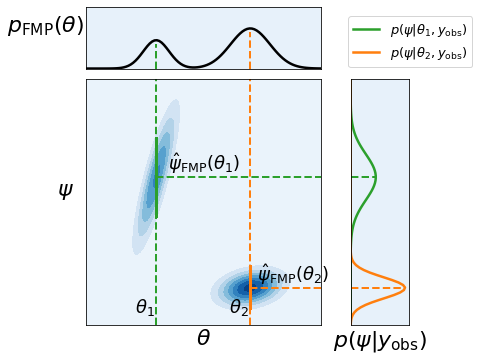

In [9]:
cmap = mpl.cm.get_cmap('Blues')
#deux lois normales maintenant.
#paramètres de la loi normale
xlim=[0,10]
mean1=np.array([3,6])
mean2=np.array([7,1.5])
cor1=0.8
cor2=0.1
p=0.5 #pondération entre les modes
cov1=np.array([[0.3,cor1],[cor1,3]])
cov2=np.array([[0.7,cor2],[cor2,0.2]])

x=np.linspace(0,10,100)
X,Y=np.meshgrid(x,x)
pos=np.dstack((X,Y))
rv1=mvn(mean=mean1,cov=cov1)
rv2=mvn(mean=mean2,cov=cov2)

theta1=mean1[0]
theta2=mean2[0]
hpar1=mean1[1]
hpar2=mean2[1]

#marginales. 11:thetamode1 12:thetamode2, etc.
#la mixture doit se faire dans la méthode plot.
#les deux amrginales fmp sont inchangées, seulement leur poids.

mtheta1=norm(loc=mean1[0],scale=np.sqrt(cov1[0,0]))
mtheta2=norm(loc=mean2[0],scale=np.sqrt(cov2[0,0]))
mhpars1=norm(loc=mean1[1],scale=np.sqrt(cov1[1,1]-cov1[0,1]**2/cov1[0,0]))
mhpars2=norm(loc=mean2[1],scale=np.sqrt(cov2[1,1]-cov2[0,1]**2/cov2[0,0]))
p1=p*np.sqrt((cov1[0,0]/(cov1[0,0]*cov1[1,1]-cov1[0,1]**2)))
p2=p*np.sqrt((cov2[0,0]/(cov2[0,0]*cov2[1,1]-cov2[0,1]**2)))
s=p1+p2
p1/=s
p2/=s
valmax=0.5

#plots
fig,axs=plt.subplots(figsize=[6,5],nrows=2,ncols=2,gridspec_kw={'width_ratios': [4, 1],'height_ratios': [1,4],})
axs[0,1].remove()
for axd in axs:
    for ax in axd:
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])

axs[0,0].set_xlim(xlim)
axs[1,1].set_ylim(xlim)
axs[0,1].set_xlim(xlim)
axs[0,1].set_ylim(xlim)
axs[0,0].set_ylim([0,valmax])
axs[1,1].set_xlim([0,2*valmax])


axs[0,0].plot(x,p1*mtheta1.pdf(x)+p2*mtheta2.pdf(x),lw=2.5,color='black')

axs[1,1].plot(mhpars1.pdf(x),x,lw=2.5,c=col1,label=r'$p(\psi|\theta_1,y_\mathrm{obs})$')
axs[1,1].plot(mhpars2.pdf(x),x,lw=2.5,c=col2,label=r'$p(\psi|\theta_2,y_\mathrm{obs})$')

contour=axs[1,0].contourf(X,Y,p*rv1.pdf(pos)+(1-p)*rv2.pdf(pos),cmap=cmap,linestyles='dashed')
axs[0,0].set_facecolor(cmap(20))
axs[1,1].set_facecolor(cmap(20))

#labels
axs[1,0].set_xlabel(r'$\theta$')
axs[1,0].set_ylabel(r'$\psi$',rotation=0,labelpad=20)
axs[1,1].set_xlabel(r'$p(\psi|y_\mathrm{obs})$')
axs[0,0].set_ylabel(r'$p_{\mathrm{FMP}}(\theta)$',rotation=0,labelpad=40)

#droites..
lw=2
#theta1
axs[1,0].plot([theta1,10],[hpar1,hpar1],color=col1,linestyle='dashed',lw=lw)#hori
axs[1,0].plot([theta1,theta1],[0,10],color=col1,linestyle='dashed',lw=lw)#v
axs[1,0].plot([theta1,theta1],[4.4,7.6],color=col1,lw=lw+1)#v

axs[0,0].plot([theta1,theta1],[0,0.2],color=col1,linestyle='dashed',lw=lw)

axs[1,1].plot([0,0.43],[hpar1,hpar1],color=col1,linestyle='dashed',lw=lw)

axs[1,0].annotate(r'$\hat{\psi}_{\mathrm{FMP}}(\theta_1)$',[3.5,6.3],fontsize=18)
axs[1,0].annotate(r'$\theta_1$',[2.1,0.5],fontsize=18)

#theta2
axs[1,0].plot([theta2,10],[hpar2,hpar2],color=col2,linestyle='dashed',lw=lw)#hori
axs[1,0].plot([theta2,theta2],[0,10],color=col2,linestyle='dashed',lw=lw)#v
axs[1,0].plot([theta2,theta2],[0.7,2.4],color=col2,lw=lw+1)#v

axs[0,0].plot([theta2,theta2],[0,0.3],color=col2,linestyle='dashed',lw=lw)

axs[1,1].plot([0,0.87],[hpar2,hpar2],color=col2,linestyle='dashed',lw=lw)

axs[1,0].annotate(r'$\hat{\psi}_{\mathrm{FMP}}(\theta_2)$',[7.3,1.8],fontsize=18)
axs[1,0].annotate(r'$\theta_2$',[6.1,0.5],fontsize=18)
plt.tight_layout(pad=0.3)
#axs[1,1].legend(loc='upper left',bbox_to_anchor=(-0.15,1.35))
axs[1,1].legend(loc='upper left',bbox_to_anchor=(-0.15,1.28),fontsize=13)

plt.show()

0.2886751345948129
1.118033988749895


/home/catB/nl255551/miniconda3/envs/snowflakes_env/lib/python3.7/site-packages/ipykernel_launcher.py:95: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


0.9999999999999999
1.0


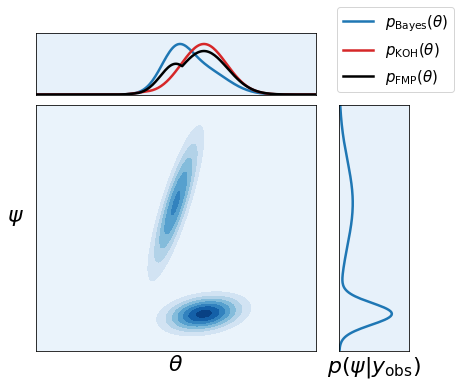

In [10]:
#test pour afficher toutes les post theta sur les figures pathologiques.
cmap = mpl.cm.get_cmap('Blues')
#deux lois normales maintenant.
#paramètres de la loi normale
xlim=[0,10]
mean1=np.array([5,6])
mean2=np.array([6,1.5])
cor1=0.8
cor2=0.1
p=0.5 #pondération entre les modes
cov1=np.array([[0.3,cor1],[cor1,3]])
cov2=np.array([[0.7,cor2],[cor2,0.2]])

#définition des marginales complètes (somme des deux modes)
def pmargtheta(theta):
    p1=norm(loc=mean1[0],scale=np.sqrt(cov1[0,0]))
    p2=norm(loc=mean2[0],scale=np.sqrt(cov2[0,0]))
    return p*p1.pdf(theta)+(1-p)*p2.pdf(theta)

def pmargpsi(psi):
    p1=norm(loc=mean1[1],scale=np.sqrt(cov1[1,1]))
    p2=norm(loc=mean2[1],scale=np.sqrt(cov2[1,1]))
    return p*p1.pdf(psi)+(1-p)*p2.pdf(psi)

def mpmargpsi(psi):
    return -1*pmargpsi(psi)

#calcul critère koh pour savoir quel mode est choisi. on choisit celui qui a le plus gros critère.
critkoh1=p/np.sqrt(cov1[1,1])
critkoh2=(1-p)/np.sqrt(cov2[1,1])
print(critkoh1)
print(critkoh2)

x=np.linspace(0,10,200)
X,Y=np.meshgrid(x,x)
pos=np.dstack((X,Y))
rv1=mvn(mean=mean1,cov=cov1)
rv2=mvn(mean=mean2,cov=cov2)

theta1=mean1[0]
theta2=mean2[0]
hpar1=mean1[1]
hpar2=mean2[1]

#marginales KOH. 11:thetamode1 12:thetamode2, etc.
#la mixture doit se faire dans la méthode plot.
#les deux amrginales fmp sont inchangées, seulement leur poids.

mtheta1=norm(loc=mean1[0],scale=np.sqrt(cov1[0,0]))
mtheta2=norm(loc=mean2[0],scale=np.sqrt(cov2[0,0]))
mhpars1=norm(loc=mean1[1],scale=np.sqrt(cov1[1,1]))
mhpars2=norm(loc=mean2[1],scale=np.sqrt(cov2[1,1]))


#trouver les hpars opt
#fonction à minimiser
def fopt(hpars,theta):
    x=np.array([theta,hpars[0]])
    return -1*(p*rv1.pdf(x)+(1-p)*rv2.pdf(x))
    
#fonction qui renvoie hpars optimaux
def hparsopt(theta):
    bounds=[0,10]
    #optimisation locale: on lance donc l'optimi depuis 2 bassins : le 1 et le 2.
    resbassin1=scipy.optimize.minimize(fopt,mean1[1],args=(theta),method='Nelder-Mead')
    resbassin2=scipy.optimize.minimize(fopt,mean2[1],args=(theta),method='Nelder-Mead')
    if(resbassin1.fun<resbassin2.fun):
        return resbassin1.x
    else:
        return resbassin2.x

#fonction qui renvoie la densité FMP.
def fmp(theta):
    hp=hparsopt(theta)
    x=np.array([theta,hp[0]])
    return (p*rv1.pdf(x)+(1-p)*rv2.pdf(x))#/pmargpsi(hp)

#fonction pour trouver les hpars koh.
def hparskoh():
    bounds=[0,10]
    #optimisation locale: on lance donc l'optimi depuis 2 bassins : le 1 et le 2.
    resbassin1=scipy.optimize.minimize(mpmargpsi,mean1[1],method='Nelder-Mead')
    resbassin2=scipy.optimize.minimize(mpmargpsi,mean2[1],method='Nelder-Mead')
    if(resbassin1.fun<resbassin2.fun):
        return resbassin1.x
    else:
        return resbassin2.x
    
hpkoh=hparskoh()
#construction des valeurs fmp, une à la fois.
YFMP=np.zeros(len(x))
YKOH=np.zeros(len(x))
for i in range(len(x)):
    YFMP[i]=fmp(x[i])
    tup=np.array([x[i],hpkoh])
    YKOH[i]=p*rv1.pdf(tup)+(1-p)*rv2.pdf(tup)
    
YKOH/=np.sum(YKOH)*10/len(x)
print(np.sum(YKOH)*10/len(x))

YFMP/=np.sum(YFMP)*10/len(x)
print(np.sum(YFMP)*10/len(x))

#plots
fig,axs=plt.subplots(figsize=[6,5],nrows=2,ncols=2,gridspec_kw={'width_ratios': [4, 1],'height_ratios': [1,4],})
axs[0,1].remove()
for axd in axs:
    for ax in axd:
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])

axs[0,0].set_xlim(xlim)
axs[1,1].set_ylim(xlim)
axs[0,1].set_xlim(xlim)
axs[0,1].set_ylim(xlim)
axs[0,0].set_ylim([0,0.6])
axs[1,1].set_xlim([0,0.6])

axs[0,0].plot(x,p*mtheta1.pdf(x)+(1-p)*mtheta2.pdf(x),lw=2.5,color='tab:blue',label=r'$p_{\mathrm{Bayes}}(\theta)$')

axs[0,0].plot(x,YKOH,lw=2.5,color='tab:red',label=r'$p_{\mathrm{KOH}}(\theta)$')
axs[0,0].plot(x,YFMP,lw=2.5,color='black',label=r'$p_{\mathrm{FMP}}(\theta)$')
axs[1,1].plot(p*mhpars1.pdf(x)+(1-p)*mhpars2.pdf(x),x,lw=2.5,color='tab:blue')



contour=axs[1,0].contourf(X,Y,p*rv1.pdf(pos)+(1-p)*rv2.pdf(pos),cmap=cmap,linestyles='dashed')
axs[0,0].set_facecolor(cmap(20))
axs[1,1].set_facecolor(cmap(20))

#labels
axs[1,0].set_xlabel(r'$\theta$')
axs[1,0].set_ylabel(r'$\psi$',rotation=0,labelpad=20)
axs[1,1].set_xlabel(r'$p(\psi|y_\mathrm{obs})$')
#axs[0,0].set_ylabel(r'$p_{\mathrm{FMP}}(\theta)$',rotation=0,labelpad=40)

plt.tight_layout(pad=0.3)
axs[0,0].legend(loc='upper right',bbox_to_anchor=(1.52,1.55),fontsize=15)



plt.show()

0.2886751345948129
1.118033988749895


/home/catB/nl255551/miniconda3/envs/snowflakes_env/lib/python3.7/site-packages/ipykernel_launcher.py:94: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


0.9999999999999999
1.0


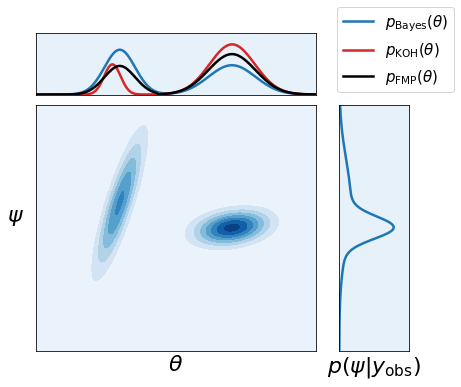

In [11]:
#test pour afficher toutes les post theta sur les figures pathologiques.
cmap = mpl.cm.get_cmap('Blues')
#deux lois normales maintenant.
#paramètres de la loi normale
mean1=np.array([3,6])
mean2=np.array([7,5])
cor1=0.8
cor2=0.1
p=0.5 #pondération entre les modes
cov1=np.array([[0.3,cor1],[cor1,3]])
cov2=np.array([[0.7,cor2],[cor2,0.2]])

#définition des marginales complètes (somme des deux modes)
def pmargtheta(theta):
    p1=norm(loc=mean1[0],scale=np.sqrt(cov1[0,0]))
    p2=norm(loc=mean2[0],scale=np.sqrt(cov2[0,0]))
    return p*p1.pdf(theta)+(1-p)*p2.pdf(theta)

def pmargpsi(psi):
    p1=norm(loc=mean1[1],scale=np.sqrt(cov1[1,1]))
    p2=norm(loc=mean2[1],scale=np.sqrt(cov2[1,1]))
    return p*p1.pdf(psi)+(1-p)*p2.pdf(psi)

def mpmargpsi(psi):
    return -1*pmargpsi(psi)

#calcul critère koh pour savoir quel mode est choisi. on choisit celui qui a le plus gros critère.
critkoh1=p/np.sqrt(cov1[1,1])
critkoh2=(1-p)/np.sqrt(cov2[1,1])
print(critkoh1)
print(critkoh2)

x=np.linspace(0,10,200)
X,Y=np.meshgrid(x,x)
pos=np.dstack((X,Y))
rv1=mvn(mean=mean1,cov=cov1)
rv2=mvn(mean=mean2,cov=cov2)

theta1=mean1[0]
theta2=mean2[0]
hpar1=mean1[1]
hpar2=mean2[1]

#marginales KOH. 11:thetamode1 12:thetamode2, etc.
#la mixture doit se faire dans la méthode plot.
#les deux amrginales fmp sont inchangées, seulement leur poids.

mtheta1=norm(loc=mean1[0],scale=np.sqrt(cov1[0,0]))
mtheta2=norm(loc=mean2[0],scale=np.sqrt(cov2[0,0]))
mhpars1=norm(loc=mean1[1],scale=np.sqrt(cov1[1,1]))
mhpars2=norm(loc=mean2[1],scale=np.sqrt(cov2[1,1]))


#trouver les hpars opt
#fonction à minimiser
def fopt(hpars,theta):
    x=np.array([theta,hpars[0]])
    return -1*(p*rv1.pdf(x)+(1-p)*rv2.pdf(x))
    
#fonction qui renvoie hpars optimaux
def hparsopt(theta):
    bounds=[0,10]
    #optimisation locale: on lance donc l'optimi depuis 2 bassins : le 1 et le 2.
    resbassin1=scipy.optimize.minimize(fopt,mean1[1],args=(theta),method='Nelder-Mead')
    resbassin2=scipy.optimize.minimize(fopt,mean2[1],args=(theta),method='Nelder-Mead')
    if(resbassin1.fun<resbassin2.fun):
        return resbassin1.x
    else:
        return resbassin2.x

#fonction qui renvoie la densité FMP.
def fmp(theta):
    hp=hparsopt(theta)
    x=np.array([theta,hp[0]])
    return (p*rv1.pdf(x)+(1-p)*rv2.pdf(x))#/pmargpsi(hp)

#fonction pour trouver les hpars koh.
def hparskoh():
    bounds=[0,10]
    #optimisation locale: on lance donc l'optimi depuis 2 bassins : le 1 et le 2.
    resbassin1=scipy.optimize.minimize(mpmargpsi,mean1[1],method='Nelder-Mead')
    resbassin2=scipy.optimize.minimize(mpmargpsi,mean2[1],method='Nelder-Mead')
    if(resbassin1.fun<resbassin2.fun):
        return resbassin1.x
    else:
        return resbassin2.x
    
hpkoh=hparskoh()
#construction des valeurs fmp, une à la fois.
YFMP=np.zeros(len(x))
YKOH=np.zeros(len(x))
for i in range(len(x)):
    YFMP[i]=fmp(x[i])
    tup=np.array([x[i],hpkoh])
    YKOH[i]=p*rv1.pdf(tup)+(1-p)*rv2.pdf(tup)
    
YKOH/=np.sum(YKOH)*10/len(x)
print(np.sum(YKOH)*10/len(x))

YFMP/=np.sum(YFMP)*10/len(x)
print(np.sum(YFMP)*10/len(x))

#plots
fig,axs=plt.subplots(figsize=[6,5],nrows=2,ncols=2,gridspec_kw={'width_ratios': [4, 1],'height_ratios': [1,4],})
axs[0,1].remove()
for axd in axs:
    for ax in axd:
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])

axs[0,0].set_xlim(xlim)
axs[1,1].set_ylim(xlim)
axs[0,1].set_xlim(xlim)
axs[0,1].set_ylim(xlim)
axs[0,0].set_ylim([0,0.5])
axs[1,1].set_xlim([0,0.7])

axs[0,0].plot(x,p*mtheta1.pdf(x)+(1-p)*mtheta2.pdf(x),lw=2.5,color='tab:blue',label=r'$p_{\mathrm{Bayes}}(\theta)$')

axs[0,0].plot(x,YKOH,lw=2.5,color='tab:red',label=r'$p_{\mathrm{KOH}}(\theta)$')
axs[0,0].plot(x,YFMP,lw=2.5,color='black',label=r'$p_{\mathrm{FMP}}(\theta)$')
axs[1,1].plot(p*mhpars1.pdf(x)+(1-p)*mhpars2.pdf(x),x,lw=2.5,color='tab:blue')



contour=axs[1,0].contourf(X,Y,p*rv1.pdf(pos)+(1-p)*rv2.pdf(pos),cmap=cmap,linestyles='dashed')
axs[0,0].set_facecolor(cmap(20))
axs[1,1].set_facecolor(cmap(20))

#labels
axs[1,0].set_xlabel(r'$\theta$')
axs[1,0].set_ylabel(r'$\psi$',rotation=0,labelpad=20)
axs[1,1].set_xlabel(r'$p(\psi|y_\mathrm{obs})$')
#axs[0,0].set_ylabel(r'$p_{\mathrm{FMP}}(\theta)$',rotation=0,labelpad=40)

plt.tight_layout(pad=0.3)
axs[0,0].legend(loc='upper right',bbox_to_anchor=(1.52,1.55),fontsize=15)



plt.show()

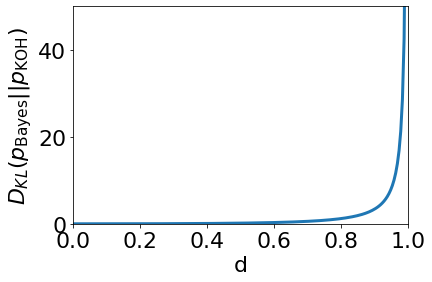

In [12]:
#plot du goodness pour KOH.
def g(d):
    return 0.5*(np.log(1-d)+d/(1-d))

x=np.linspace(0.001,0.999,200)
fig,ax=plt.subplots(figsize=[6,4])
ax.set_xlim([0,1])
ax.set_ylim([0,50])
ax.set_xlabel(r'd')
ax.set_ylabel(r'$D_{KL}(p_{\mathrm{Bayes}}||p_{\mathrm{KOH}})$')
ax.plot(x,g(x),lw=3)

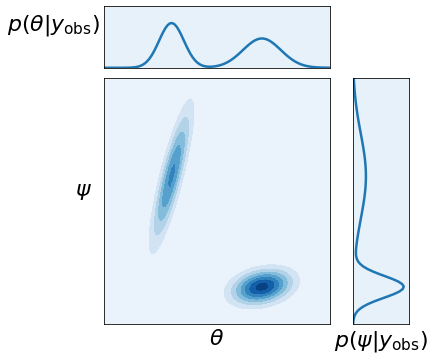

In [18]:
#film. Bayes complet.
cmap = mpl.cm.get_cmap('Blues')
#deux lois normales maintenant.
#paramètres de la loi normale
xlim=[0,10]
mean1=np.array([3,6])
mean2=np.array([7,1.5])
cor1=0.8
cor2=0.1
p=0.5 #pondération entre les modes
cov1=np.array([[0.3,cor1],[cor1,3]])
cov2=np.array([[0.7,cor2],[cor2,0.2]])

x=np.linspace(0,10,100)
X,Y=np.meshgrid(x,x)
pos=np.dstack((X,Y))
rv1=mvn(mean=mean1,cov=cov1)
rv2=mvn(mean=mean2,cov=cov2)

#marginales. 11:thetamode1 12:thetamode2, etc.
#la mixture doit se faire dans la méthode plot.

mtheta1=norm(loc=mean1[0],scale=np.sqrt(cov1[0,0]))
mtheta2=norm(loc=mean2[0],scale=np.sqrt(cov2[0,0]))
mhpars1=norm(loc=mean1[1],scale=np.sqrt(cov1[1,1]))
mhpars2=norm(loc=mean2[1],scale=np.sqrt(cov2[1,1]))
valmax=0.5

#plots
fig,axs=plt.subplots(figsize=[6,5],nrows=2,ncols=2,gridspec_kw={'width_ratios': [4, 1],'height_ratios': [1,4],})
axs[0,1].remove()
for axd in axs:
    for ax in axd:
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])

axs[0,0].set_xlim(xlim)
axs[1,1].set_ylim(xlim)
axs[0,1].set_xlim(xlim)
axs[0,1].set_ylim(xlim)
axs[0,0].set_ylim([0,valmax])
axs[1,1].set_xlim([0,valmax])


axs[0,0].plot(x,p*mtheta1.pdf(x)+(1-p)*mtheta2.pdf(x),lw=2.5)
axs[1,1].plot(p*mhpars1.pdf(x)+(1-p)*mhpars2.pdf(x),x,lw=2.5)
contour=axs[1,0].contourf(X,Y,p*rv1.pdf(pos)+(1-p)*rv2.pdf(pos),cmap=cmap,linestyles='dashed')
axs[0,0].set_facecolor(cmap(20))
axs[1,1].set_facecolor(cmap(20))

#labels
axs[1,0].set_xlabel(r'$\theta$')
axs[1,0].set_ylabel(r'$\psi$',rotation=0,labelpad=20)
axs[1,1].set_xlabel(r'$p(\psi|y_\mathrm{obs})$')
axs[0,0].set_ylabel(r'$p(\theta|y_\mathrm{obs})$',rotation=0,labelpad=50)

plt.tight_layout(pad=0.3)
plt.show()

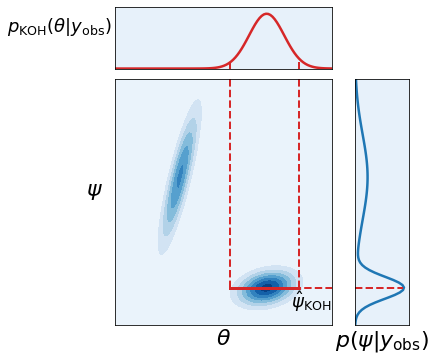

In [26]:
#film. loi KOH modèle original.

cmap = mpl.cm.get_cmap('Blues')
#deux lois normales maintenant.
#paramètres de la loi normale
xlim=[0,10]
mean1=np.array([3,6])
mean2=np.array([7,1.5])
cor1=0.8
cor2=0.1
p=0.5 #pondération entre les modes
cov1=np.array([[0.3,cor1],[cor1,3]])
cov2=np.array([[0.7,cor2],[cor2,0.2]])

x=np.linspace(0,10,100)
X,Y=np.meshgrid(x,x)
pos=np.dstack((X,Y))
rv1=mvn(mean=mean1,cov=cov1)
rv2=mvn(mean=mean2,cov=cov2)

#marginales. 11:thetamode1 12:thetamode2, etc.
#la mixture doit se faire dans la méthode plot.
#on affiche seulement la miwture theta2 qui est sélectionnée par KOH

var1=cov[0,0]-cor**2/cov[1,1]

mtheta2=norm(loc=mean2[0],scale=np.sqrt(cov2[0,0]-cor2**2/cov2[1,1]))
mhpars1=norm(loc=mean1[1],scale=np.sqrt(cov1[1,1]))
mhpars2=norm(loc=mean2[1],scale=np.sqrt(cov2[1,1]))
valmax=0.5

#plots
fig,axs=plt.subplots(figsize=[6,5],nrows=2,ncols=2,gridspec_kw={'width_ratios': [4, 1],'height_ratios': [1,4],})
axs[0,1].remove()
for axd in axs:
    for ax in axd:
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])

axs[0,0].set_xlim(xlim)
axs[1,1].set_ylim(xlim)
axs[0,1].set_xlim(xlim)
axs[0,1].set_ylim(xlim)
axs[0,0].set_ylim([0,valmax])
axs[1,1].set_xlim([0,valmax])


axs[0,0].plot(x,0.9*mtheta2.pdf(x),lw=2.5,c='tab:red')
axs[1,1].plot(p*mhpars1.pdf(x)+(1-p)*mhpars2.pdf(x),x,lw=2.5)
contour=axs[1,0].contourf(X,Y,p*rv1.pdf(pos)+(1-p)*rv2.pdf(pos),cmap=cmap,linestyles='dashed')
axs[0,0].set_facecolor(cmap(20))
axs[1,1].set_facecolor(cmap(20))

#labels
axs[1,0].set_xlabel(r'$\theta$')
axs[1,0].set_ylabel(r'$\psi$',rotation=0,labelpad=20)
axs[1,1].set_xlabel(r'$p(\psi|y_\mathrm{obs})$')
axs[0,0].set_ylabel(r'$p_{\mathrm{KOH}}(\theta|y_\mathrm{obs})$',rotation=0,labelpad=55,fontsize=18)

#droites..
ckoh='tab:red'
lw=2
xleft=5.3
xright=8.5
yhpars=mean2[1]
axs[1,0].plot([xleft,10],[yhpars,yhpars],color=ckoh,linestyle='dashed',lw=lw)
axs[1,0].plot([xleft,xright],[yhpars,yhpars],color=ckoh,lw=lw+1)
axs[1,0].plot([xleft,xleft],[yhpars,10],color=ckoh,linestyle='dashed',lw=lw)
axs[1,0].plot([xright,xright],[yhpars,10],color=ckoh,linestyle='dashed',lw=lw)

axs[0,0].plot([xleft,xleft],[0,0.05],color=ckoh,linestyle='dashed',lw=lw)
axs[0,0].plot([xright,xright],[0,0.05],color=ckoh,linestyle='dashed',lw=lw)

axs[1,1].plot([0,0.44],[yhpars,yhpars],color=ckoh,linestyle='dashed',lw=lw)

axs[1,0].annotate(r'$\hat{\psi}_{\mathrm{KOH}}$',[8.1,0.7],fontsize=18)

plt.tight_layout(pad=0.3)
plt.show()

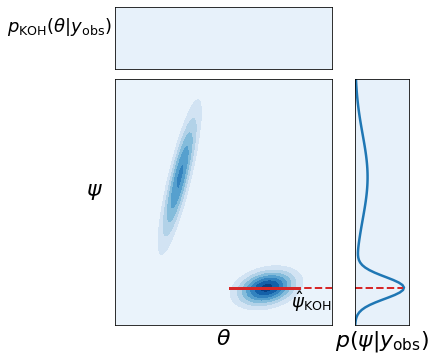

In [25]:
#film. loi KOH 1.

#film. loi KOH modèle original.

cmap = mpl.cm.get_cmap('Blues')
#deux lois normales maintenant.
#paramètres de la loi normale
xlim=[0,10]
mean1=np.array([3,6])
mean2=np.array([7,1.5])
cor1=0.8
cor2=0.1
p=0.5 #pondération entre les modes
cov1=np.array([[0.3,cor1],[cor1,3]])
cov2=np.array([[0.7,cor2],[cor2,0.2]])

x=np.linspace(0,10,100)
X,Y=np.meshgrid(x,x)
pos=np.dstack((X,Y))
rv1=mvn(mean=mean1,cov=cov1)
rv2=mvn(mean=mean2,cov=cov2)

#marginales. 11:thetamode1 12:thetamode2, etc.
#la mixture doit se faire dans la méthode plot.
#on affiche seulement la miwture theta2 qui est sélectionnée par KOH

var1=cov[0,0]-cor**2/cov[1,1]

mtheta2=norm(loc=mean2[0],scale=np.sqrt(cov2[0,0]-cor2**2/cov2[1,1]))
mhpars1=norm(loc=mean1[1],scale=np.sqrt(cov1[1,1]))
mhpars2=norm(loc=mean2[1],scale=np.sqrt(cov2[1,1]))
valmax=0.5

#plots
fig,axs=plt.subplots(figsize=[6,5],nrows=2,ncols=2,gridspec_kw={'width_ratios': [4, 1],'height_ratios': [1,4],})
axs[0,1].remove()
for axd in axs:
    for ax in axd:
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])

axs[0,0].set_xlim(xlim)
axs[1,1].set_ylim(xlim)
axs[0,1].set_xlim(xlim)
axs[0,1].set_ylim(xlim)
axs[0,0].set_ylim([0,valmax])
axs[1,1].set_xlim([0,valmax])


axs[1,1].plot(p*mhpars1.pdf(x)+(1-p)*mhpars2.pdf(x),x,lw=2.5)
contour=axs[1,0].contourf(X,Y,p*rv1.pdf(pos)+(1-p)*rv2.pdf(pos),cmap=cmap,linestyles='dashed')
axs[0,0].set_facecolor(cmap(20))
axs[1,1].set_facecolor(cmap(20))

#labels
axs[1,0].set_xlabel(r'$\theta$')
axs[1,0].set_ylabel(r'$\psi$',rotation=0,labelpad=20)
axs[1,1].set_xlabel(r'$p(\psi|y_\mathrm{obs})$')
axs[0,0].set_ylabel(r'$p_{\mathrm{KOH}}(\theta|y_\mathrm{obs})$',rotation=0,labelpad=55,fontsize=18)

#droites..
ckoh='tab:red'
lw=2
xleft=5.3
xright=8.5
yhpars=mean2[1]
axs[1,0].plot([xleft,10],[yhpars,yhpars],color=ckoh,linestyle='dashed',lw=lw)
axs[1,0].plot([xleft,xright],[yhpars,yhpars],color=ckoh,lw=lw+1)


axs[1,1].plot([0,0.44],[yhpars,yhpars],color=ckoh,linestyle='dashed',lw=lw)

axs[1,0].annotate(r'$\hat{\psi}_{\mathrm{KOH}}$',[8.1,0.7],fontsize=18)

plt.tight_layout(pad=0.3)
plt.show()

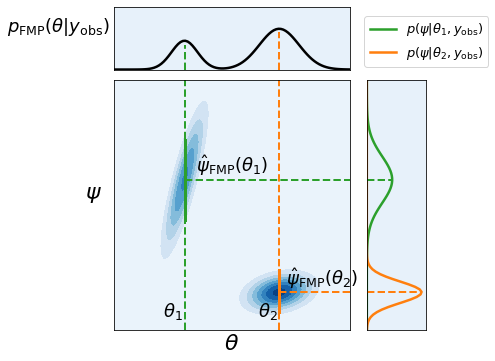

In [28]:
col1='tab:green'
col2='tab:orange'
#film. Opti complet.
cmap = mpl.cm.get_cmap('Blues')
#deux lois normales maintenant.
#paramètres de la loi normale
xlim=[0,10]
mean1=np.array([3,6])
mean2=np.array([7,1.5])
cor1=0.8
cor2=0.1
p=0.5 #pondération entre les modes
cov1=np.array([[0.3,cor1],[cor1,3]])
cov2=np.array([[0.7,cor2],[cor2,0.2]])

x=np.linspace(0,10,100)
X,Y=np.meshgrid(x,x)
pos=np.dstack((X,Y))
rv1=mvn(mean=mean1,cov=cov1)
rv2=mvn(mean=mean2,cov=cov2)

theta1=mean1[0]
theta2=mean2[0]
hpar1=mean1[1]
hpar2=mean2[1]

#marginales. 11:thetamode1 12:thetamode2, etc.
#la mixture doit se faire dans la méthode plot.
#les deux amrginales fmp sont inchangées, seulement leur poids.

mtheta1=norm(loc=mean1[0],scale=np.sqrt(cov1[0,0]))
mtheta2=norm(loc=mean2[0],scale=np.sqrt(cov2[0,0]))
mhpars1=norm(loc=mean1[1],scale=np.sqrt(cov1[1,1]-cov1[0,1]**2/cov1[0,0]))
mhpars2=norm(loc=mean2[1],scale=np.sqrt(cov2[1,1]-cov2[0,1]**2/cov2[0,0]))
p1=p*np.sqrt((cov1[0,0]/(cov1[0,0]*cov1[1,1]-cov1[0,1]**2)))
p2=p*np.sqrt((cov2[0,0]/(cov2[0,0]*cov2[1,1]-cov2[0,1]**2)))
s=p1+p2
p1/=s
p2/=s
valmax=0.5

#plots
fig,axs=plt.subplots(figsize=[6,5],nrows=2,ncols=2,gridspec_kw={'width_ratios': [4, 1],'height_ratios': [1,4],})
axs[0,1].remove()
for axd in axs:
    for ax in axd:
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])

axs[0,0].set_xlim(xlim)
axs[1,1].set_ylim(xlim)
axs[0,1].set_xlim(xlim)
axs[0,1].set_ylim(xlim)
axs[0,0].set_ylim([0,valmax])
axs[1,1].set_xlim([0,2*valmax])


axs[0,0].plot(x,p1*mtheta1.pdf(x)+p2*mtheta2.pdf(x),lw=2.5,color='black')

axs[1,1].plot(mhpars1.pdf(x),x,lw=2.5,c=col1,label=r'$p(\psi|\theta_1,y_\mathrm{obs})$')
axs[1,1].plot(mhpars2.pdf(x),x,lw=2.5,c=col2,label=r'$p(\psi|\theta_2,y_\mathrm{obs})$')

contour=axs[1,0].contourf(X,Y,p*rv1.pdf(pos)+(1-p)*rv2.pdf(pos),cmap=cmap,linestyles='dashed')
axs[0,0].set_facecolor(cmap(20))
axs[1,1].set_facecolor(cmap(20))

#labels
axs[1,0].set_xlabel(r'$\theta$')
axs[1,0].set_ylabel(r'$\psi$',rotation=0,labelpad=20)
axs[0,0].set_ylabel(r'$p_{\mathrm{FMP}}(\theta|y_\mathrm{obs})$',rotation=0,labelpad=55,fontsize=18)

#droites..
lw=2
#theta1
axs[1,0].plot([theta1,10],[hpar1,hpar1],color=col1,linestyle='dashed',lw=lw)#hori
axs[1,0].plot([theta1,theta1],[0,10],color=col1,linestyle='dashed',lw=lw)#v
axs[1,0].plot([theta1,theta1],[4.4,7.6],color=col1,lw=lw+1)#v

axs[0,0].plot([theta1,theta1],[0,0.2],color=col1,linestyle='dashed',lw=lw)

axs[1,1].plot([0,0.43],[hpar1,hpar1],color=col1,linestyle='dashed',lw=lw)

axs[1,0].annotate(r'$\hat{\psi}_{\mathrm{FMP}}(\theta_1)$',[3.5,6.3],fontsize=18)
axs[1,0].annotate(r'$\theta_1$',[2.1,0.5],fontsize=18)

#theta2
axs[1,0].plot([theta2,10],[hpar2,hpar2],color=col2,linestyle='dashed',lw=lw)#hori
axs[1,0].plot([theta2,theta2],[0,10],color=col2,linestyle='dashed',lw=lw)#v
axs[1,0].plot([theta2,theta2],[0.7,2.4],color=col2,lw=lw+1)#v

axs[0,0].plot([theta2,theta2],[0,0.3],color=col2,linestyle='dashed',lw=lw)

axs[1,1].plot([0,0.87],[hpar2,hpar2],color=col2,linestyle='dashed',lw=lw)

axs[1,0].annotate(r'$\hat{\psi}_{\mathrm{FMP}}(\theta_2)$',[7.3,1.8],fontsize=18)
axs[1,0].annotate(r'$\theta_2$',[6.1,0.5],fontsize=18)
plt.tight_layout(pad=0.3)
#axs[1,1].legend(loc='upper left',bbox_to_anchor=(-0.15,1.35))
axs[1,1].legend(loc='upper left',bbox_to_anchor=(-0.15,1.28),fontsize=13)

plt.show()

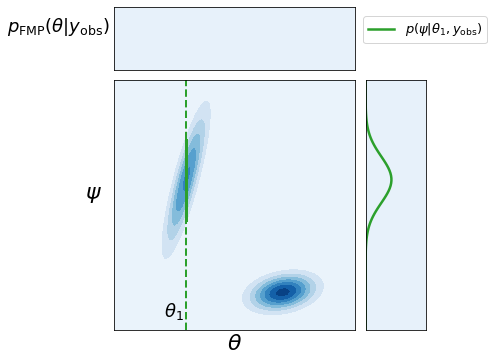

In [29]:
#film. Opti étape 1.
cmap = mpl.cm.get_cmap('Blues')
#deux lois normales maintenant.
#paramètres de la loi normale
xlim=[0,10]
mean1=np.array([3,6])
mean2=np.array([7,1.5])
cor1=0.8
cor2=0.1
p=0.5 #pondération entre les modes
cov1=np.array([[0.3,cor1],[cor1,3]])
cov2=np.array([[0.7,cor2],[cor2,0.2]])

x=np.linspace(0,10,100)
X,Y=np.meshgrid(x,x)
pos=np.dstack((X,Y))
rv1=mvn(mean=mean1,cov=cov1)
rv2=mvn(mean=mean2,cov=cov2)

theta1=mean1[0]
theta2=mean2[0]
hpar1=mean1[1]
hpar2=mean2[1]

#marginales. 11:thetamode1 12:thetamode2, etc.
#la mixture doit se faire dans la méthode plot.
#les deux amrginales fmp sont inchangées, seulement leur poids.

mtheta1=norm(loc=mean1[0],scale=np.sqrt(cov1[0,0]))
mtheta2=norm(loc=mean2[0],scale=np.sqrt(cov2[0,0]))
mhpars1=norm(loc=mean1[1],scale=np.sqrt(cov1[1,1]-cov1[0,1]**2/cov1[0,0]))
mhpars2=norm(loc=mean2[1],scale=np.sqrt(cov2[1,1]-cov2[0,1]**2/cov2[0,0]))
p1=p*np.sqrt((cov1[0,0]/(cov1[0,0]*cov1[1,1]-cov1[0,1]**2)))
p2=p*np.sqrt((cov2[0,0]/(cov2[0,0]*cov2[1,1]-cov2[0,1]**2)))
s=p1+p2
p1/=s
p2/=s
valmax=0.5

#plots
fig,axs=plt.subplots(figsize=[6,5],nrows=2,ncols=2,gridspec_kw={'width_ratios': [4, 1],'height_ratios': [1,4],})
axs[0,1].remove()
for axd in axs:
    for ax in axd:
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])

axs[0,0].set_xlim(xlim)
axs[1,1].set_ylim(xlim)
axs[0,1].set_xlim(xlim)
axs[0,1].set_ylim(xlim)
axs[0,0].set_ylim([0,valmax])
axs[1,1].set_xlim([0,2*valmax])



axs[1,1].plot(mhpars1.pdf(x),x,lw=2.5,c=col1,label=r'$p(\psi|\theta_1,y_\mathrm{obs})$')

contour=axs[1,0].contourf(X,Y,p*rv1.pdf(pos)+(1-p)*rv2.pdf(pos),cmap=cmap,linestyles='dashed')
axs[0,0].set_facecolor(cmap(20))
axs[1,1].set_facecolor(cmap(20))

#labels
axs[1,0].set_xlabel(r'$\theta$')
axs[1,0].set_ylabel(r'$\psi$',rotation=0,labelpad=20)
axs[0,0].set_ylabel(r'$p_{\mathrm{FMP}}(\theta|y_\mathrm{obs})$',rotation=0,labelpad=55,fontsize=18)

#droites..
lw=2
#theta1
axs[1,0].plot([theta1,theta1],[0,10],color=col1,linestyle='dashed',lw=lw)#v
axs[1,0].plot([theta1,theta1],[4.4,7.6],color=col1,lw=lw+1)#v



axs[1,0].annotate(r'$\theta_1$',[2.1,0.5],fontsize=18)


plt.tight_layout(pad=0.3)
#axs[1,1].legend(loc='upper left',bbox_to_anchor=(-0.15,1.35))
axs[1,1].legend(loc='upper left',bbox_to_anchor=(-0.15,1.28),fontsize=13)

plt.show()

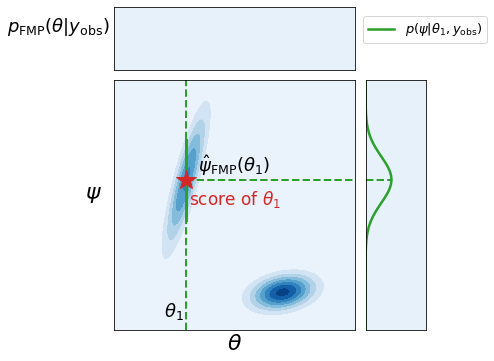

In [30]:
#film. Opti étape 1.
cmap = mpl.cm.get_cmap('Blues')
#deux lois normales maintenant.
#paramètres de la loi normale
xlim=[0,10]
mean1=np.array([3,6])
mean2=np.array([7,1.5])
cor1=0.8
cor2=0.1
p=0.5 #pondération entre les modes
cov1=np.array([[0.3,cor1],[cor1,3]])
cov2=np.array([[0.7,cor2],[cor2,0.2]])

x=np.linspace(0,10,100)
X,Y=np.meshgrid(x,x)
pos=np.dstack((X,Y))
rv1=mvn(mean=mean1,cov=cov1)
rv2=mvn(mean=mean2,cov=cov2)

theta1=mean1[0]
theta2=mean2[0]
hpar1=mean1[1]
hpar2=mean2[1]

#marginales. 11:thetamode1 12:thetamode2, etc.
#la mixture doit se faire dans la méthode plot.
#les deux amrginales fmp sont inchangées, seulement leur poids.

mtheta1=norm(loc=mean1[0],scale=np.sqrt(cov1[0,0]))
mtheta2=norm(loc=mean2[0],scale=np.sqrt(cov2[0,0]))
mhpars1=norm(loc=mean1[1],scale=np.sqrt(cov1[1,1]-cov1[0,1]**2/cov1[0,0]))
mhpars2=norm(loc=mean2[1],scale=np.sqrt(cov2[1,1]-cov2[0,1]**2/cov2[0,0]))
p1=p*np.sqrt((cov1[0,0]/(cov1[0,0]*cov1[1,1]-cov1[0,1]**2)))
p2=p*np.sqrt((cov2[0,0]/(cov2[0,0]*cov2[1,1]-cov2[0,1]**2)))
s=p1+p2
p1/=s
p2/=s
valmax=0.5

#plots
fig,axs=plt.subplots(figsize=[6,5],nrows=2,ncols=2,gridspec_kw={'width_ratios': [4, 1],'height_ratios': [1,4],})
axs[0,1].remove()
for axd in axs:
    for ax in axd:
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])

axs[0,0].set_xlim(xlim)
axs[1,1].set_ylim(xlim)
axs[0,1].set_xlim(xlim)
axs[0,1].set_ylim(xlim)
axs[0,0].set_ylim([0,valmax])
axs[1,1].set_xlim([0,2*valmax])



axs[1,1].plot(mhpars1.pdf(x),x,lw=2.5,c=col1,label=r'$p(\psi|\theta_1,y_\mathrm{obs})$')

contour=axs[1,0].contourf(X,Y,p*rv1.pdf(pos)+(1-p)*rv2.pdf(pos),cmap=cmap,linestyles='dashed')
axs[0,0].set_facecolor(cmap(20))
axs[1,1].set_facecolor(cmap(20))

#labels
axs[1,0].set_xlabel(r'$\theta$')
axs[1,0].set_ylabel(r'$\psi$',rotation=0,labelpad=20)
axs[0,0].set_ylabel(r'$p_{\mathrm{FMP}}(\theta|y_\mathrm{obs})$',rotation=0,labelpad=55,fontsize=18)

#droites..
lw=2
#theta1
axs[1,0].plot([theta1,10],[hpar1,hpar1],color=col1,linestyle='dashed',lw=lw)#hori
axs[1,0].plot([theta1,theta1],[0,10],color=col1,linestyle='dashed',lw=lw)#v
axs[1,0].plot([theta1,theta1],[4.4,7.6],color=col1,lw=lw+1)#v


axs[1,1].plot([0,0.43],[hpar1,hpar1],color=col1,linestyle='dashed',lw=lw)

axs[1,0].annotate(r'$\hat{\psi}_{\mathrm{FMP}}(\theta_1)$',[3.5,6.3],fontsize=18)
axs[1,0].annotate(r'$\theta_1$',[2.1,0.5],fontsize=18)

axs[1,0].plot([theta1],[6],color="tab:red",marker='*',ms=20)#marker
axs[1,0].annotate(r'score of $\theta_1$',[3.1,5.0],color='tab:red',fontsize=17)


plt.tight_layout(pad=0.3)
#axs[1,1].legend(loc='upper left',bbox_to_anchor=(-0.15,1.35))
axs[1,1].legend(loc='upper left',bbox_to_anchor=(-0.15,1.28),fontsize=13)

plt.show()

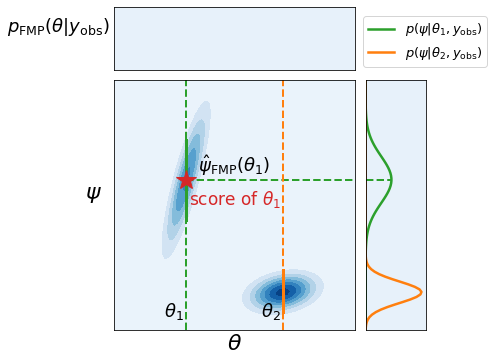

In [31]:
#film. Opti complet.
cmap = mpl.cm.get_cmap('Blues')
#deux lois normales maintenant.
#paramètres de la loi normale
xlim=[0,10]
mean1=np.array([3,6])
mean2=np.array([7,1.5])
cor1=0.8
cor2=0.1
p=0.5 #pondération entre les modes
cov1=np.array([[0.3,cor1],[cor1,3]])
cov2=np.array([[0.7,cor2],[cor2,0.2]])

x=np.linspace(0,10,100)
X,Y=np.meshgrid(x,x)
pos=np.dstack((X,Y))
rv1=mvn(mean=mean1,cov=cov1)
rv2=mvn(mean=mean2,cov=cov2)

theta1=mean1[0]
theta2=mean2[0]
hpar1=mean1[1]
hpar2=mean2[1]

#marginales. 11:thetamode1 12:thetamode2, etc.
#la mixture doit se faire dans la méthode plot.
#les deux amrginales fmp sont inchangées, seulement leur poids.

mtheta1=norm(loc=mean1[0],scale=np.sqrt(cov1[0,0]))
mtheta2=norm(loc=mean2[0],scale=np.sqrt(cov2[0,0]))
mhpars1=norm(loc=mean1[1],scale=np.sqrt(cov1[1,1]-cov1[0,1]**2/cov1[0,0]))
mhpars2=norm(loc=mean2[1],scale=np.sqrt(cov2[1,1]-cov2[0,1]**2/cov2[0,0]))
p1=p*np.sqrt((cov1[0,0]/(cov1[0,0]*cov1[1,1]-cov1[0,1]**2)))
p2=p*np.sqrt((cov2[0,0]/(cov2[0,0]*cov2[1,1]-cov2[0,1]**2)))
s=p1+p2
p1/=s
p2/=s
valmax=0.5

#plots
fig,axs=plt.subplots(figsize=[6,5],nrows=2,ncols=2,gridspec_kw={'width_ratios': [4, 1],'height_ratios': [1,4],})
axs[0,1].remove()
for axd in axs:
    for ax in axd:
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])

axs[0,0].set_xlim(xlim)
axs[1,1].set_ylim(xlim)
axs[0,1].set_xlim(xlim)
axs[0,1].set_ylim(xlim)
axs[0,0].set_ylim([0,valmax])
axs[1,1].set_xlim([0,2*valmax])



axs[1,1].plot(mhpars1.pdf(x),x,lw=2.5,c=col1,label=r'$p(\psi|\theta_1,y_\mathrm{obs})$')
axs[1,1].plot(mhpars2.pdf(x),x,lw=2.5,c=col2,label=r'$p(\psi|\theta_2,y_\mathrm{obs})$')

contour=axs[1,0].contourf(X,Y,p*rv1.pdf(pos)+(1-p)*rv2.pdf(pos),cmap=cmap,linestyles='dashed')
axs[0,0].set_facecolor(cmap(20))
axs[1,1].set_facecolor(cmap(20))

#labels
axs[1,0].set_xlabel(r'$\theta$')
axs[1,0].set_ylabel(r'$\psi$',rotation=0,labelpad=20)
axs[0,0].set_ylabel(r'$p_{\mathrm{FMP}}(\theta|y_\mathrm{obs})$',rotation=0,labelpad=55,fontsize=18)

#droites..
lw=2
#theta1
axs[1,0].plot([theta1,10],[hpar1,hpar1],color=col1,linestyle='dashed',lw=lw)#hori
axs[1,0].plot([theta1,theta1],[0,10],color=col1,linestyle='dashed',lw=lw)#v
axs[1,0].plot([theta1,theta1],[4.4,7.6],color=col1,lw=lw+1)#v


axs[1,1].plot([0,0.43],[hpar1,hpar1],color=col1,linestyle='dashed',lw=lw)

axs[1,0].annotate(r'$\hat{\psi}_{\mathrm{FMP}}(\theta_1)$',[3.5,6.3],fontsize=18)
axs[1,0].annotate(r'$\theta_1$',[2.1,0.5],fontsize=18)


axs[1,0].plot([theta1],[6],color="tab:red",marker='*',ms=20)#marker
axs[1,0].annotate(r'score of $\theta_1$',[3.1,5.0],color='tab:red',fontsize=17)

#theta2
axs[1,0].plot([theta2,theta2],[0,10],color=col2,linestyle='dashed',lw=lw)#v
axs[1,0].plot([theta2,theta2],[0.7,2.4],color=col2,lw=lw+1)#v



axs[1,0].annotate(r'$\theta_2$',[6.1,0.5],fontsize=18)
plt.tight_layout(pad=0.3)
#axs[1,1].legend(loc='upper left',bbox_to_anchor=(-0.15,1.35))
axs[1,1].legend(loc='upper left',bbox_to_anchor=(-0.15,1.28),fontsize=13)

plt.show()

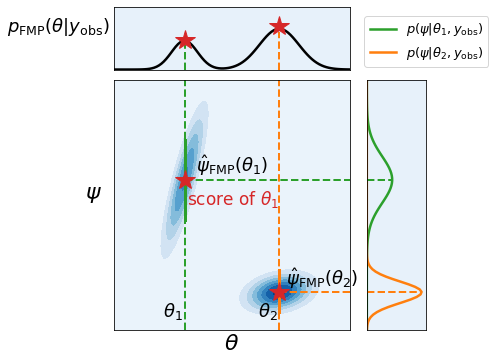

In [33]:
#film. Opti complet.
cmap = mpl.cm.get_cmap('Blues')
#deux lois normales maintenant.
#paramètres de la loi normale
xlim=[0,10]
mean1=np.array([3,6])
mean2=np.array([7,1.5])
cor1=0.8
cor2=0.1
p=0.5 #pondération entre les modes
cov1=np.array([[0.3,cor1],[cor1,3]])
cov2=np.array([[0.7,cor2],[cor2,0.2]])

x=np.linspace(0,10,100)
X,Y=np.meshgrid(x,x)
pos=np.dstack((X,Y))
rv1=mvn(mean=mean1,cov=cov1)
rv2=mvn(mean=mean2,cov=cov2)

theta1=mean1[0]
theta2=mean2[0]
hpar1=mean1[1]
hpar2=mean2[1]

#marginales. 11:thetamode1 12:thetamode2, etc.
#la mixture doit se faire dans la méthode plot.
#les deux amrginales fmp sont inchangées, seulement leur poids.

mtheta1=norm(loc=mean1[0],scale=np.sqrt(cov1[0,0]))
mtheta2=norm(loc=mean2[0],scale=np.sqrt(cov2[0,0]))
mhpars1=norm(loc=mean1[1],scale=np.sqrt(cov1[1,1]-cov1[0,1]**2/cov1[0,0]))
mhpars2=norm(loc=mean2[1],scale=np.sqrt(cov2[1,1]-cov2[0,1]**2/cov2[0,0]))
p1=p*np.sqrt((cov1[0,0]/(cov1[0,0]*cov1[1,1]-cov1[0,1]**2)))
p2=p*np.sqrt((cov2[0,0]/(cov2[0,0]*cov2[1,1]-cov2[0,1]**2)))
s=p1+p2
p1/=s
p2/=s
valmax=0.5

#plots
fig,axs=plt.subplots(figsize=[6,5],nrows=2,ncols=2,gridspec_kw={'width_ratios': [4, 1],'height_ratios': [1,4],})
axs[0,1].remove()
for axd in axs:
    for ax in axd:
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])

axs[0,0].set_xlim(xlim)
axs[1,1].set_ylim(xlim)
axs[0,1].set_xlim(xlim)
axs[0,1].set_ylim(xlim)
axs[0,0].set_ylim([0,valmax])
axs[1,1].set_xlim([0,2*valmax])


axs[0,0].plot(x,p1*mtheta1.pdf(x)+p2*mtheta2.pdf(x),lw=2.5,color='black')

axs[1,1].plot(mhpars1.pdf(x),x,lw=2.5,c=col1,label=r'$p(\psi|\theta_1,y_\mathrm{obs})$')
axs[1,1].plot(mhpars2.pdf(x),x,lw=2.5,c=col2,label=r'$p(\psi|\theta_2,y_\mathrm{obs})$')

contour=axs[1,0].contourf(X,Y,p*rv1.pdf(pos)+(1-p)*rv2.pdf(pos),cmap=cmap,linestyles='dashed')
axs[0,0].set_facecolor(cmap(20))
axs[1,1].set_facecolor(cmap(20))

#labels
axs[1,0].set_xlabel(r'$\theta$')
axs[1,0].set_ylabel(r'$\psi$',rotation=0,labelpad=20)
axs[0,0].set_ylabel(r'$p_{\mathrm{FMP}}(\theta|y_\mathrm{obs})$',rotation=0,labelpad=55,fontsize=18)

#droites..
lw=2
#theta1
axs[1,0].plot([theta1,10],[hpar1,hpar1],color=col1,linestyle='dashed',lw=lw)#hori
axs[1,0].plot([theta1,theta1],[0,10],color=col1,linestyle='dashed',lw=lw)#v
axs[1,0].plot([theta1,theta1],[4.4,7.6],color=col1,lw=lw+1)#v

axs[0,0].plot([theta1,theta1],[0,0.2],color=col1,linestyle='dashed',lw=lw)

axs[1,1].plot([0,0.43],[hpar1,hpar1],color=col1,linestyle='dashed',lw=lw)

axs[1,0].annotate(r'$\hat{\psi}_{\mathrm{FMP}}(\theta_1)$',[3.5,6.3],fontsize=18)
axs[1,0].annotate(r'$\theta_1$',[2.1,0.5],fontsize=18)

axs[1,0].plot([theta1],[6],color="tab:red",marker='*',ms=20)#marker
axs[1,0].annotate(r'score of $\theta_1$',[3.1,5.0],color='tab:red',fontsize=17)

axs[0,0].plot([theta1],[0.24],color="tab:red",marker='*',ms=20)#marker

#theta2
axs[1,0].plot([theta2,10],[hpar2,hpar2],color=col2,linestyle='dashed',lw=lw)#hori
axs[1,0].plot([theta2,theta2],[0,10],color=col2,linestyle='dashed',lw=lw)#v
axs[1,0].plot([theta2,theta2],[0.7,2.4],color=col2,lw=lw+1)#v

axs[0,0].plot([theta2,theta2],[0,0.3],color=col2,linestyle='dashed',lw=lw)

axs[1,1].plot([0,0.87],[hpar2,hpar2],color=col2,linestyle='dashed',lw=lw)

axs[1,0].annotate(r'$\hat{\psi}_{\mathrm{FMP}}(\theta_2)$',[7.3,1.8],fontsize=18)
axs[1,0].annotate(r'$\theta_2$',[6.1,0.5],fontsize=18)



axs[1,0].plot([theta2],[1.5],color="tab:red",marker='*',ms=20)#marker
axs[0,0].plot([theta2],[0.35],color="tab:red",marker='*',ms=20)#marker



plt.tight_layout(pad=0.3)
#axs[1,1].legend(loc='upper left',bbox_to_anchor=(-0.15,1.35))
axs[1,1].legend(loc='upper left',bbox_to_anchor=(-0.15,1.28),fontsize=13)

plt.show()